In [9]:
import numpy as np
import os
import cv2 as cv
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D


In [10]:
TRAIN_DIR = "../dataset/training_set"
TEST_DIR = "../dataset/test_set"

categories = ["cats", "dogs"]

In [11]:
dim = 100 #dimension of the images

## Creating Training Data

In [12]:
train_data = []

def create_train_data():
    for categ in categories:
        num = categories.index(categ)
        path = os.path.join(TRAIN_DIR, categ)
        for images in os.listdir(path):
            img2arr = cv.imread(os.path.join(path, images), cv.IMREAD_GRAYSCALE) #converting images into greyscale as colour isn't a differentiating factor between cats and dogs
            new_img2arr = cv.resize(img2arr, (dim, dim)) # converting images to array
            train_data.append([new_img2arr, num])


In [13]:
create_train_data()

In [14]:
train_data[0]

[array([[ 43,  44,  43, ...,  94, 183, 193],
        [ 40,  37,  38, ..., 103, 177, 194],
        [ 43,  37,  40, ...,  91, 174, 195],
        ...,
        [ 21,  20,  20, ...,  84,  73,  41],
        [ 24,  18,  21, ...,  59,  39,  30],
        [ 29,  20,  24, ...,  89,  19,  36]], dtype=uint8),
 0]

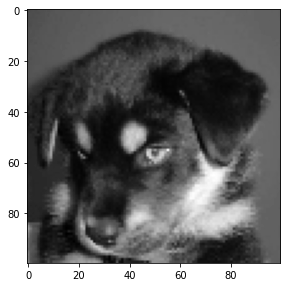

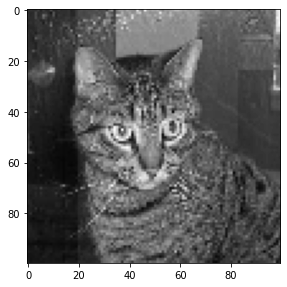

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7)).add_subplot(1, 2, 1)
plt.imshow(train_data[-2][0], cmap='gray')
plt.figure(figsize=(10, 7)).add_subplot(1, 2, 1)
plt.imshow(train_data[0][0], cmap='gray')

plt.show()

In [16]:
import random
random.shuffle(train_data)

In [17]:
X_train = []
y_train = []

for features, lable in train_data:
    X_train.append(features)
    y_train.append(lable)

In [18]:
X_train[0].size

10000

In [19]:
X_train = np.array(X_train).astype('float32').reshape(-1, dim, dim, 1)
y_train = np.array(y_train).astype('int32').reshape((-1,1))

In [20]:
print(X_train.shape)
print(y_train.shape)


(8000, 100, 100, 1)
(8000, 1)


In [21]:
X_train = X_train/255.0 #normalizing the image's pixel values

## Making Model

In [22]:
# This model uses 3 convolutional layers and 2 dense fully connected layers along with pooling layer to reduce size of images after each step
model = tf.keras.models.Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=X_train.shape[1:]),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.3), # dropout is used to reduce the model from overfitting too much

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.2),
    

    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [23]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 23, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 256)       2

In [25]:
model.fit(X_train, y_train,batch_size=16,validation_split=0.1, epochs=10)

Epoch 1/10
450/450 [==============================] - 109s 242ms/step - loss: 0.6960 - accuracy: 0.5104 - val_loss: 0.6850 - val_accuracy: 0.5850
Epoch 2/10
450/450 [==============================] - 108s 240ms/step - loss: 0.6861 - accuracy: 0.5460 - val_loss: 0.6798 - val_accuracy: 0.5487
Epoch 3/10
450/450 [==============================] - 117s 260ms/step - loss: 0.6646 - accuracy: 0.6015 - val_loss: 0.6490 - val_accuracy: 0.6488
Epoch 4/10
450/450 [==============================] - 107s 239ms/step - loss: 0.6168 - accuracy: 0.6612 - val_loss: 0.5729 - val_accuracy: 0.7237
Epoch 5/10
450/450 [==============================] - 102s 227ms/step - loss: 0.5518 - accuracy: 0.7217 - val_loss: 0.5206 - val_accuracy: 0.7375
Epoch 6/10
450/450 [==============================] - 101s 223ms/step - loss: 0.4882 - accuracy: 0.7663 - val_loss: 0.4872 - val_accuracy: 0.7600
Epoch 7/10
450/450 [==============================] - 104s 231ms/step - loss: 0.4341 - accuracy: 0.7953 - val_loss: 0.4526 -

## Saving the model

In [26]:
model.save('my_model.h5')

## Loading the model

In [27]:
new_model = tf.keras.models.load_model('my_model.h5')
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 23, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 256)       2